Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# CSE204 - Introduction to Machine Learning - Lab Session 8: Classification of the CIFAR-10 dataset using CNNs

<img src="https://raw.githubusercontent.com/adimajo/CSE204-2021/master/data/logo.jpg" style="float: left; width: 15%" />

[CSE204-2021](https://moodle.polytechnique.fr/course/view.php?id=12838) Lab session #08

J.B. Scoggins - Adrien Ehrhardt

The [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) provides 60000 32x32-pixel images, classified into 10 categories.  The figure below provides a random sample of some images in each category.

![](https://github.com/jbscoggi/teaching/blob/master/Polytechnique/CSE204/artwork/cifar_images.png?raw=1)

During this session, you will learn how to build a Convolutional Neural Network (CNN), which (when trained) will be able to automatically classify new images into one of these categories.  We will make use of the [Keras library](https://www.tensorflow.org/guide/keras) which provides a high-level interface to TensorFlow, which you have already seen.

## Introduction to Keras

Keras is a high-level API to build and train deep learning models. It's used for fast prototyping, advanced research, and production, with three key advantages:

- __User friendly__: Keras has a simple, consistent interface optimized for common use cases. It provides clear and actionable feedback for user errors.
- __Modular and composable__: Keras models are made by connecting configurable building blocks together, with few restrictions.
- __Easy to extend__: Write custom building blocks to express new ideas for research. Create new layers, loss functions, and develop state-of-the-art models.

In Keras, models are built by assembling multiple layers.  Suppose we want to create a new multilayer perceptron model to categorize 128-feature data into 10 labeled categories.  The Keras code could look like:

```python
# Create a sequential model
model = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model
model.add(layers.Dense(64, activation='relu'), input_shape=[128])
# Add another
model.add(layers.Dense(32, activation='relu'))
# Add a softmax layer with 10 output units
model.add(layers.Dense(10, activation='softmax'))
```

The `input_shape` argument must be given for the first layer in the model, however all other layers will automatically determine the input shape based on the previous layer in the model.  Note that the code above is substantially simpler than the corresponding TensorFlow code.  This is particularly useful for building convolutional or other types of layers, as we will see.

Once built, a model's learning can be configured with the `compile()` function

```python
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.train.AdamOptimizer(0.001), 
    metrics=['accuracy'])
```

In this case, a cross-entropy loss function is used with the ADAM optimization algorithm.  The `metrics` argument allows the model to keep track of a number of [training metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) during training.

Once configured, training is performed using the `fit()` function.

```python
model.fit(data, labels, epochs=10, batch_size=32)
```

The function takes an array-like (could be numpy array) of data and the corresponding target values, and performs the optimization of the learnable parameters in the model.  See the documentation for the [fit()](https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#fit) function for more details.

Once trained, the model can be used to predict, using the `predict()` function. 

```python
prediction = model.predict(new_data)
```
  
## Tasks
Begin by importing the necessary modules.

In [ ]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

### Understand the dataset

Understanding your dataset is the first prerequisit to training any model. The CIFAR-10 dataset is provided directly from Keras. Implement the function `load_cifar_data` below to:
- Download the dataset. See [`tf.keras.datasets`](https://keras.io/datasets/) for how to download the data, and what format it is provided.  Note that the dataset is already divided into a training set of 50000 images, and a test set of 10000.
- Verify that the shape of the image and target arrays are what you expect.
- Create a list of `labels` corresponding to the 10 categories.  This will be used to convert the 0-9 digits in the target arrays to string labels. The categories are labeled as follows
  0. airplane
  1. automobile
  2. bird
  3. cat
  4. deer
  5. dog
  6. frog
  7. horse
  8. ship
  9. truck
- Normalize the image data from [0,255] to be [0,1].  Normalizing improves model training.  (to test this, you can comment out the normalization later)
- Lastly, convert the target arrays to one-hot encodings.  Hint: checkout the [`tf.keras.utils.to_categorical()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)

In [ ]:
def load_cifar_data():
    """
    Loads the CIFAR-10 dataset using Keras and preprocess for training: 
        - one-hot encoding;
        - normalization;
        - labels (list of strings associated to the one-hot encoding of `y`).
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return x_train, y_train, x_test, y_test, labels

In [ ]:
x_train, y_train, x_test, y_test, labels = load_cifar_data()
assert x_train.shape == (50000, 32, 32, 3)
assert 0 <= x_train[0][0][0][0] <= 1

Implement the function `show_first_n_images_in_categories` below to visualize some images in each category using the `imshow()` function in `matplotlib.pyplot`. Can you recreate the figure at the top of today's lab? Hint: the it was created using the first 8 images belonging to each category in the training data.

In [ ]:
# Visualize the dataset
def show_first_n_images_in_categories(n: int, images: np.array, categories: np.array,
                                      labels: np.array, file_name: str = None):
    """Plots the first n images in each category from the image data.
    
    :param int n: number of images per category to plot
    :param numpy.array images: images as numerical data (x_*)
    :param numpy.array categories: the categories of each image in `images`
    :param numpy.array labels: the labels of categories 0 .. 9    
    :param str file_name: print figure to file (optional)
    """
    f, axes = plt.subplots(n, 10, figsize=(11, 8))
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
show_first_n_images_in_categories(8, x_train, y_train, labels)

### First naive model

In order to better understand the importance of CNNs, it is instructive to first see how well a naive dense network, as the one we've done in the previous lab, performs on the dataset.

- Create a sequential model with 4 `Dense` hidden layers of 2048, 1024, 512, and 256 nodes each, with ReLU activation, and a linear output layer of 10 nodes.  Note that you will need to use the `Flatten` layer first in order to convert the 3D (x, y, rgb) image data into 1D. How is the resulting vector ordered with respect to its original 3D structure?
- Compile the model with a `categorical_crossentropy` loss, using the [SGD optimizer](https://keras.io/api/optimizers/sgd/), including the `accuracy` metric.

*Note*: this is similar to [lab_session_07](https://adimajo.github.io/CSE204-2021/lab_session_07/lab_session_07.html).

#### SGD algorithm (recall from [lab_session_06](https://adimajo.github.io/CSE204-2021/lab_session_06/lab_session_06.html))

Until now, we used (the "classical" or "batch") gradient descent, i.e. we averaged (or summed) the gradient of the loss w.r.t. each point in the dataset and then performed an update step, e.g.

$$\theta^{(t + 1)} = \theta^{(t)} - \eta \sum_{i=1}^n \nabla_{\theta^{(t)}}\ell_i.$$

Whenever $n$ is very large, this can become a problem. Alternatively, one could do:

$$\theta^{(t + 1)} = \theta^{(t)} - \eta \nabla_{\theta^{(t)}} \ell_i,$$

where $i$ is sampled randomly without replacement from $\{1, \dots, n\}$. Now $\theta^{(t)}$ changes "more often" so this can yield instabilities... such that "mini-batch(es)" might be needed: instead of using all the training data, or a single data point, we split the data into smaller subsets (e.g. 32 samples).

In [ ]:
def dense_model(input_shape, num_classes):
    """
    Returns a compiled keras Sequential model
    
    :param tuple input_shape: shape of ONE example as passed to the first layer
    :param int num_classes: number of output classes as passed to the last layer
    """
    # model = ...  # <- TO UNCOMMENT AND COMPLETE
    # YOUR CODE HERE
    raise NotImplementedError()
    # model.compile(...)  # <- TO UNCOMMENT AND COMPLETE
    # YOUR CODE HERE
    raise NotImplementedError()
    return model

In [ ]:
model = dense_model(x_train.shape[1:], 10)

In [ ]:
assert len(model.layers) >= 6
assert 'flatten' in model.layers[0].name.lower()
assert model.optimizer._name == 'SGD'

- Compute by hand the total number of trainable parameters (weights and biases) in the model (you can add an image in a new cell using Edit > Insert New Image; provide some detail...).

YOUR ANSWER HERE

- Use the `summary()` function on model to get a text summary of the model.  Did you compute the number of parameters correctly?

In [ ]:
model.summary()

- Train the model:
  - Start with a small batch size of 32 samples and train the model for 10 epochs;
  - Use early stopping on the validation accuracy with a patience of 2.

*[Early stopping](https://keras.io/api/callbacks/early_stopping/):* stop before reaching the specified number of epochs if given criteria are met, e.g. if a level of improvement during the last epoch(s) has not been reached.

*Patience:* number of epochs where the given criteria have not been matched, but we "pay to view".

*[Keras callbacks](https://keras.io/api/callbacks/)*: functions evaluated at the end of each epoch, e.g. an early stopping rule, or some monitoring / saving function, ...

In [ ]:
def train_model(model, x: np.array, y: np.array,
                x_test: np.array, y_test: np.array,
                batch_size: int = 32, epochs: int = 10, file_name: str = None):
    """
    Trains the model on the given data.

    :param keras.sequential model: the instanciated model to train
    :param numpy.array x: the training data
    :param numpy.array y: the true values
    :param numpy.array x_test: the test data
    :param numpy.array y_test: the true test values
    :param int batch_size: 
    :param int epochs: 
    """
    # ...
    # model.fit(...)  # <- TO UNCOMMENT AND COMPLETE
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Uncomment: Computationally heavy
# train_model(model, x_train, y_train, x_test, y_test)

- How does the model perform? Is it any better than a random guess? 
- Try changing the batch size to see if there is any improvement.
- Try adding batch normalization after each hidden layer.  Any better?

Discuss in the cell(s) below.

YOUR ANSWER HERE

### Convolutional Net

Convolutional neural networks (see this week's slides) allow us to do drastically better on this dataset (and many image classification problems in general). In this task, you will build your first convolutional network and see how it performs.

- Create a new model with the following layers
  - 3x3 2D convolution with zero padding (same), 32 filters
  - ReLU activation
  - 3,3 2D convolution, no padding, 32 filters
  - ReLU activation
  - Max pooling with size (2,2)
  - 3x3 2D convolution, no padding, 64 filters
  - ReLU activation
  - 3x3 2D convolution, no padding, 64 filters
  - ReLU activation
  - Max pooling with size (2,2)
  - Flatten
  - Dense layer with 512 nodes, ReLU activation
  - Softmax output layer with 10 nodes
- Compile the network with same optimizer and metrics as the dense network. 

In [ ]:
def cnn_model(input_shape: tuple, num_classes: int):
    """
    Returns a compiled keras Conv2D model
    
    :param tuple input_shape: shape of ONE example as passed to the first layer
    :param int num_classes: number of output classes as passed to the last layer
    """
    # model = ...
    # YOUR CODE HERE
    raise NotImplementedError()
    # model.compile(...)
    # YOUR CODE HERE
    raise NotImplementedError()
    return(model)

In [ ]:
model = cnn_model(x_train.shape[1:], 10)
assert len(model.layers) >= 13

- Compute by hand the number of trainable parameters in this network.  Are there more or less than the more simple dense network? Why? (Give some details; use the markdown cell below OR add a new cell add an image using Edit > Insert Image).

YOUR ANSWER HERE

Confirm with `summary()`.

In [ ]:
model.summary()

- Use the same training procedure as before for 10 epochs and batch size of 32.
- How does the validation accuracy change with each epoch?
- Increase the batch size to 64 and retrain.  Better or worse?  Try 128 as well.  How does increasing the batch size improve the training?
- Note how the validation accuracy begins to decrease at some point, while the training accuracy continues to increase.  What is this phenomena called?  Try adding 3 dropout layers to the model, one before each max pooling layer and one before the last layer, using a dropout ratio of 0.25.  Does this improve over-fitting?
- Play with batch normalization.  For example, add batch normalization layers after each dropout layer.  Do you notice a faster increase in the model improvement? Why?

Discuss in the cell(s) below.

In [ ]:
# Uncomment: computationally heavy
# train_model(model, x_train, y_train, x_test, y_test)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Make some predictions

Assuming all went well during the previous tasks, you can now predict the category of a new image!  Here are a few examples of predictions:

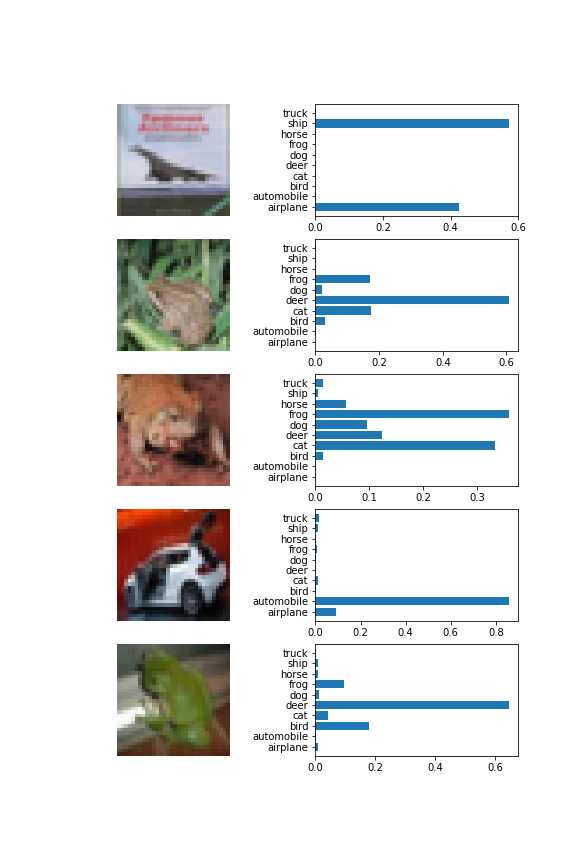

- Use `predict` on your trained model to test its prediction on a few example images.  You can use images taken from the test dataset, as these were not used to train your model. *Hint*: it can be convenient to use the `save` and `load_model` functions from Keras if you plan on working back and forth on the lab, i.e. you can save the model after training it, and then decide to load from from the file instead of building a new one on successive runs.
- Using `imshow`, subplots and `barh` from `matplotlib.pyplot`, try to recreate the image above for a few example images.

In [ ]:
def predict(model, x: np.array, labels: list, file_name: str = None):
    """
    Plots the figures for which we want to predict the class alongside
    the predicted probabilities of each class.

    :param model: Keras model
    :param numpy.array x: a few test points to predict
    :param list labels: the list of labels associated with classes 0, ..., 9
    :param str file_name: (optional) filename to save the plot
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

- Create a _confusion matrix_. A confusion matrix is often used in supervised learning to understand how well (or not) each category is being classified.  Each element (i,j) in the confusion matrix represents for each true (actual) class i the predicted class j.  Consider the following 10 predictions for a 2 category model predicting male or female.

| example     | true category  | predicted category  |
|-------------|----------------|---------------------|
| 1           | male           | male                |
| 2           | female         | male                |
| 3           | female         | female              |
| 4           | male           | male                |
| 5           | male           | female              |
| 6           | male           | male                |
| 7           | female         | female              |
| 8           | male           | female              |
| 9           | female         | female              |
| 10          | female         | female              |

Based on the above data, the model is accurate 70% of the time.  The confusion matrix is

|                    | _predicted_ male | _predicted_ female |
|--------------------|------------------|--------------------|
| _actual_ male      | 3                | 2                  |
| _actual_ female    | 1                | 4                  |

The confusion matrix gives us more information than a simple accuracy measurement.  In this case, we see that the class female has a higher accuracy over male. Create the confusion matrix **as a Pandas DataFrame** on the CIFAR-10 dataset using the test data, with **"actual {label}"** as rows and **"predicted {label}"** as columns.  What does it tell you about the relationships between each class? Comment in the cell(s) below.

In [ ]:
def confusion_matrix(model, x_test: np.array, y_test: np.array, labels: list) -> pd.DataFrame:
    """
    Predict on x_test using model
    Use sklearn.metrics.confusion_matrix to get the matrix
    Prettify the result

    :param model: keras model
    :param numpy.array x: a few test points to predict
    :param numpy.array x: true values associated with x_test
    :param list labels: list of names of labels
    """
    # df = ...  # <- TO UNCOMMENT AND COMPLETE
    # YOUR CODE HERE
    raise NotImplementedError()
    # making the table look fancy
    df.style.set_properties(**{'width':'6em', 'text-align':'center'}).set_table_styles([dict(selector="th", props=[('text-align', 'center')])])
    return df

In [ ]:
conf_matrix = confusion_matrix(model, x_test, y_test, labels)

In [ ]:
conf_matrix

### F1 Score

Quoting Wikipedia: "Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance."

In our example, precision for the airplane class is the number of true airplanes classified as such by our model divided by number of airplanes our model predicted. In other words, the diagonal elements divided by the sum over the whole column. Recall is the number of true airplanes classified as such by our model divided by the number of actual airplanes. In other words, the diagonal elements divided by the sum over the whole row.

In general, **one wants both metrics to be high**. In an extreme case, if we predict only airplanes, all relevant airplanes will be among the predicted, yielding a recall of 1, but a poor precision. On the other end of the spectrum, if we're good at predicting only a particular type of airplane which appears in the dataset as an airplane, and predict no other airplanes, precision will be high, but recall quite poor.

Subsequently, the F1 score is traditionally used to sum up both metrics as their harmonic mean:

$$\text{F1} = \dfrac{2 * \text{precision} * \text{recall}}{\text{precision} + \text{recall}}.$$

This metric can be computed for each class. They can then be averaged. The simple average is called a **macro** F1 score. A **weighted** average takes into account the proportion of samples in each class in the training dataset to weight each F1 score.

Implement the F1 score below.

In [ ]:
def f1_score(conf_matrix: pd.DataFrame):
    """
    Compute f1_score of each category, macro and weighted f1

    :param pandas.DataFrame conf_matrix: a confidence matrix (as given by confusion_matrix)
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return f1_scores, macro_f1, weighted_f1

In [ ]:
f1_scores, macro_f1, weighted_f1 = f1_score(conf_matrix)
print("F1 Macro:", macro_f1)
print("F1 Weighted:", weighted_f1)

## Further exercises (Bonus)

- Try training on [additional datasets available with Keras](https://keras.io/api/datasets/). For example, the MNIST data (hand-written digits) will require virtually no code changes to train.
- Play with different CNN architectures. Can you beat the performance of the net used in this lab?